100% (1370 of 1370) |#####################| Elapsed Time: 0:00:17 Time: 0:00:17
100% (1882 of 1882) |#####################| Elapsed Time: 0:05:11 Time: 0:05:11


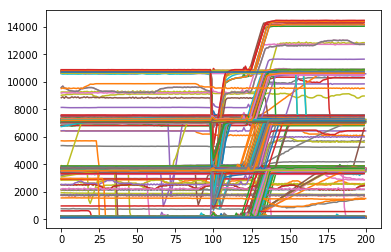

In [1]:
from IMPORT_DATAFRAME_JSON_HDF5 import *
%matplotlib inline
import matplotlib.pyplot as plt

data = import_trasient_from_file("jsons/")
data = map_transients_to_PQ_data(data, "HDF5", 20, ['P'])

for a in range(0, len(data)):
    plt.plot(data.iloc[a]['P'])
    

data['charging_status']=0
data['P_mean']=0
data['P_delta'] = 0
data['P_Plugin']=0
data['P_Unplug'] = 0
for row in range(0, len(data)):
    # Getting the mean power before during and after the timestamp (-T, T)
    # Defining charging_status as 1 for avg(P)>300W else 0 and writing it to a new column
    P_mean = sum(data.iloc[row]['P']) / float(len(data.iloc[row]['P']))
    data.set_value(data.index[row],'P_mean', P_mean)
    if P_mean>300:
        data.set_value(data.index[row],'charging_status',int(1))
    else:
       data.set_value(data.index[row],'charging_status', int(0))
     # Defining if a new car is plugged in during the appearance of the transient
    P_mean_before = sum((data.iloc[row]['P'])[:10]) / float(len((data.iloc[row]['P'])[:10])) 
    P_mean_after = sum((data.iloc[row]['P'])[(len(data.iloc[row]['P'])-10):]) / float(len((data.iloc[row]['P'])[(len(data.iloc[row]['P'])-10):])) 
    P_delta = P_mean_after - P_mean_before
    data.set_value(data.index[row],'P_delta',P_delta)
    if P_delta > 2000:
        data.set_value(data.index[row],'P_Plugin',int(1))
    elif P_delta < -2000:
        data.set_value(data.index[row],'P_Unplug',int(1))

In [3]:
data.head()

,begin_index,begin_timestamp_string,filtered_signal,phase_num,raw_signal_current,raw_signal_voltage,three_first_peaks,three_first_peaks_index,transient_rise_gradient,P,charging_status,P_mean,P_delta,P_Plugin,P_Unplug
begin_timestamp_float,,,,,,,,,,,,,,,
1.491027e+09,701,01-04-2017_08:01:41_529732,"[7.9862e-06, 0.0259479208, -0.0389019368, 7.97...",2,"[0.6561279297, 0.7019042969, 0.7629394531, 0.7...","[289.647277832, 289.6991882324, 289.8029785156...","[26.198, 4.360, 2.076]","[754, 884, 1015]",2.458070e+05,"[105.77301788330078, 104.60313415527344, 105.3...",0,105,0,0,0
1.491027e+09,806,01-04-2017_08:14:53_521148,"[0.3013579845, 0.27552866940000004, 0.30145740...",2,"[0.732421875, 0.7171630859, 0.7476806641, 0.76...","[289.1282348633, 289.2579956055, 289.335845947...","[21.480, 3.592, 1.415]","[860, 1074, 1427]",1.951086e+05,"[105.6083755493164, 105.91771697998047, 105.88...",0,105,0,0,0
1.491073e+09,5717,01-04-2017_20:57:48_799036,"[-0.0624732189, -0.1910434365, 0.0152767645, -...",2,"[-1.2969970703, -1.2512207031, -1.2359619141, ...","[-292.2813720703, -292.3981628418, -292.618743...","[26.096, 4.280, 2.540]","[5769, 5892, 6032]",2.423178e+05,"[107.5003433227539, 107.1847915649414, 107.303...",0,106,-1,0,0
1.488462e+09,2750,02-03-2017_14:42:56_465712,"[-0.1300312473, 7.76288e-05, -0.0388483592, 0....",1,"[-2.6092529297000002, -2.6092529297000002, -2....","[0.1690305471, -0.1430258453, -0.3770681620000...","[58.447, 13.698, 33.141]","[2760, 2843, 3400]",-2.846197e+06,"[3704.182861328125, 3712.759521484375, 3715.73...",1,4850,3551,1,0
1.488462e+09,9697,02-03-2017_14:45:31_804547,"[0.142554611, 0.0336101092, 0.1024524048000000...",3,"[-31.0211181641, -31.1126708984, -31.127929687...","[-297.951385498, -297.7366638184, -297.6964111...","[40.280, 21.233, 2.845]","[9709, 9791, 9874]",-1.692315e+06,"[7219.86328125, 7217.51416015625, 7218.6166992...",1,8313,3503,1,0


In [4]:
# save data as json file
data.to_csv("raw_data.csv")

The above preprocessing uses the P timeseries (see above figure) of the hdf5 file to extract features for later clustering. 
These features are: charging_status [0,1] --> 1 if at least 1 car is charging at the moment of the transient
                    P_mean --> average of the power during the transient (+-T)
                    P_delta --> The difference between the average of the last values of the P timeseries and the first values
                    P_Plugin[0,1] --> Depending on P_delta, is set to 1 if a power difference of at least 2000W is measured
                    P_Unplug [0,1] --> Is 1 if P_delta is <-2000W

In [2]:
data.head()

,begin_index,begin_timestamp_string,filtered_signal,phase_num,raw_signal_current,raw_signal_voltage,three_first_peaks,three_first_peaks_index,transient_rise_gradient,P,charging_status,P_mean,P_delta,P_Plugin,P_Unplug
begin_timestamp_float,,,,,,,,,,,,,,,
1.491027e+09,701,01-04-2017_08:01:41_529732,"[7.9862e-06, 0.0259479208, -0.0389019368, 7.97...",2,"[0.6561279297, 0.7019042969, 0.7629394531, 0.7...","[289.647277832, 289.6991882324, 289.8029785156...","[26.198, 4.360, 2.076]","[754, 884, 1015]",2.458070e+05,"[105.77301788330078, 104.60313415527344, 105.3...",0,105,0,0,0
1.491027e+09,806,01-04-2017_08:14:53_521148,"[0.3013579845, 0.27552866940000004, 0.30145740...",2,"[0.732421875, 0.7171630859, 0.7476806641, 0.76...","[289.1282348633, 289.2579956055, 289.335845947...","[21.480, 3.592, 1.415]","[860, 1074, 1427]",1.951086e+05,"[105.6083755493164, 105.91771697998047, 105.88...",0,105,0,0,0
1.491073e+09,5717,01-04-2017_20:57:48_799036,"[-0.0624732189, -0.1910434365, 0.0152767645, -...",2,"[-1.2969970703, -1.2512207031, -1.2359619141, ...","[-292.2813720703, -292.3981628418, -292.618743...","[26.096, 4.280, 2.540]","[5769, 5892, 6032]",2.423178e+05,"[107.5003433227539, 107.1847915649414, 107.303...",0,106,-1,0,0
1.488462e+09,2750,02-03-2017_14:42:56_465712,"[-0.1300312473, 7.76288e-05, -0.0388483592, 0....",1,"[-2.6092529297000002, -2.6092529297000002, -2....","[0.1690305471, -0.1430258453, -0.3770681620000...","[58.447, 13.698, 33.141]","[2760, 2843, 3400]",-2.846197e+06,"[3704.182861328125, 3712.759521484375, 3715.73...",1,4850,3551,1,0
1.488462e+09,9697,02-03-2017_14:45:31_804547,"[0.142554611, 0.0336101092, 0.1024524048000000...",3,"[-31.0211181641, -31.1126708984, -31.127929687...","[-297.951385498, -297.7366638184, -297.6964111...","[40.280, 21.233, 2.845]","[9709, 9791, 9874]",-1.692315e+06,"[7219.86328125, 7217.51416015625, 7218.6166992...",1,8313,3503,1,0


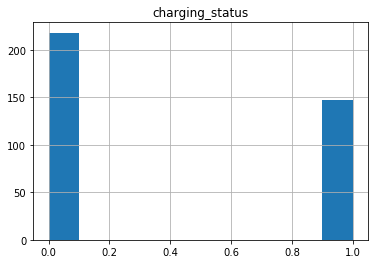

In [24]:
data.hist(column='charging_status')
plt.show()


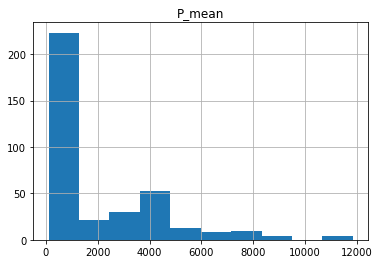

In [28]:
data.hist(column='P_mean')
plt.show()

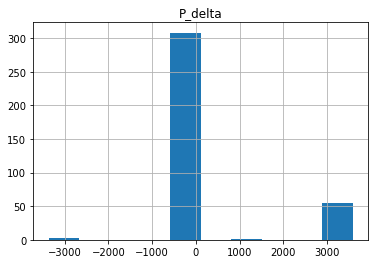

In [25]:
data.hist(column='P_delta')
plt.show()

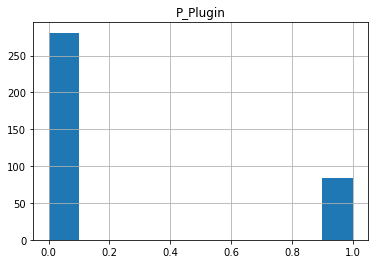

In [26]:
data.hist(column='P_Plugin')
plt.show()

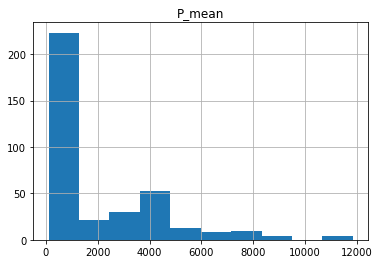

## Feature extraction